Tahap pertama dalam membuat pie chart dari database postgresql adalah dengan membangun dan menghubungkan koneksi antara python dengan server postgresql

In [1]:
# Import package 
import psycopg2 as pg
import pandas as pd
# Built connection between python and postgresql server
connection = pg.connect("dbname=dvdrental user=postgres host=localhost port=5432 password=135791")
# query the data and chain the connection
df = pd.read_sql("""
		 WITH table1 AS(
			SELECT co.country_id AS id_negara, co.country AS negara, 
			 	COUNT(DISTINCT cu.customer_id) AS total_pelanggan,
			 	SUM(p.amount) AS total_pendapatan
			 FROM country AS co
			 INNER JOIN city AS ci
			 USING(country_id)
			 INNER JOIN address AS a
			 USING(city_id)
			 INNER JOIN customer AS cu
			 USING(address_id)
			 INNER JOIN payment AS p
			 USING(customer_id)
			 GROUP BY 1, 2
			 ORDER BY 4 DESC
			 ),
			table2 AS(
			SELECT SUM(total_pendapatan) AS total
			FROM table1
			),
			table3 AS(
			SELECT table1.id_negara, table1.negara, ROUND(total_pendapatan/ total * 100, 2) AS persentase_pendapatan_tiap_negara
			FROM table1
			CROSS JOIN table2
			),
			table4 AS(
			SELECT table1.negara, persentase_pendapatan_tiap_negara
			FROM table1
			INNER JOIN table3
			USING(negara))
			
		SELECT *
		FROM table4 
        WHERE persentase_pendapatan_tiap_negara > 1.0

""", connection)
# display query result
display(df)

,negara,persentase_pendapatan_tiap_negara
0,India,9.84
1,China,8.56
2,United States,6.01
3,Japan,5.09
4,Mexico,4.87
5,Brazil,4.76
6,Russian Federation,4.51
7,Philippines,3.62
8,Turkey,2.44
9,Indonesia,2.21


Langkah kedua yaitu mengquery data kedua yang ingin ditambahkan pada hasil query pertama

In [2]:
# query the second data and chain the connection
df2 = pd.read_sql("""
		 WITH table1 AS(
			SELECT co.country_id AS id_negara, co.country AS negara, 
			 	COUNT(DISTINCT cu.customer_id) AS total_pelanggan,
			 	SUM(p.amount) AS total_pendapatan
			 FROM country AS co
			 INNER JOIN city AS ci
			 USING(country_id)
			 INNER JOIN address AS a
			 USING(city_id)
			 INNER JOIN customer AS cu
			 USING(address_id)
			 INNER JOIN payment AS p
			 USING(customer_id)
			 GROUP BY 1, 2
			 ORDER BY 4 DESC
			 ),
			table2 AS(
			SELECT SUM(total_pendapatan) AS total
			FROM table1
			),
			table3 AS(
			SELECT table1.id_negara, table1.negara, ROUND(total_pendapatan/ total * 100, 2) AS persentase_pendapatan_tiap_negara
			FROM table1
			CROSS JOIN table2
			),
			table4 AS(
			SELECT table1.negara, persentase_pendapatan_tiap_negara
			FROM table1
			INNER JOIN table3
			USING(negara))
			
		SELECT SUM(persentase_pendapatan_tiap_negara) AS "total other < 1%"
		FROM table4 
        WHERE persentase_pendapatan_tiap_negara < 1.0

""", connection)
# display the result
display(df2)

,total other < 1%
0,28.26


Langkah ketiga yaitu menambahkan hasil query kedua ke hasil query pertama. Tujuannya yaitu untuk menambahkan satu value dari query kedua ke query pertama.

In [3]:
# Convert the dataframe into numpy array thus it can be appended with new value
import numpy as np
arr1 = df.negara.to_numpy()
newArr1 = np.append (arr1, ['other < 1%'])
arr2 = df.persentase_pendapatan_tiap_negara.to_numpy()
arrOther = df2.to_numpy()
newArr2 = np.append (arr2, arrOther[0])

# convert the numpy array that have been added with value into a dataframe
dataset = pd.DataFrame({'newArr1': newArr1, 'newArr2': newArr2}, columns=['newArr1', 'newArr2'])
# change columns name
df = dataset.rename(columns={"newArr1": "negara", "newArr2": "persentase_pendapatan"})
# display the result
display(df)

,negara,persentase_pendapatan
0,India,9.84
1,China,8.56
2,United States,6.01
3,Japan,5.09
4,Mexico,4.87
5,Brazil,4.76
6,Russian Federation,4.51
7,Philippines,3.62
8,Turkey,2.44
9,Indonesia,2.21


Langkah terakhir yaitu memplotkan dataframe menjadi pie chart

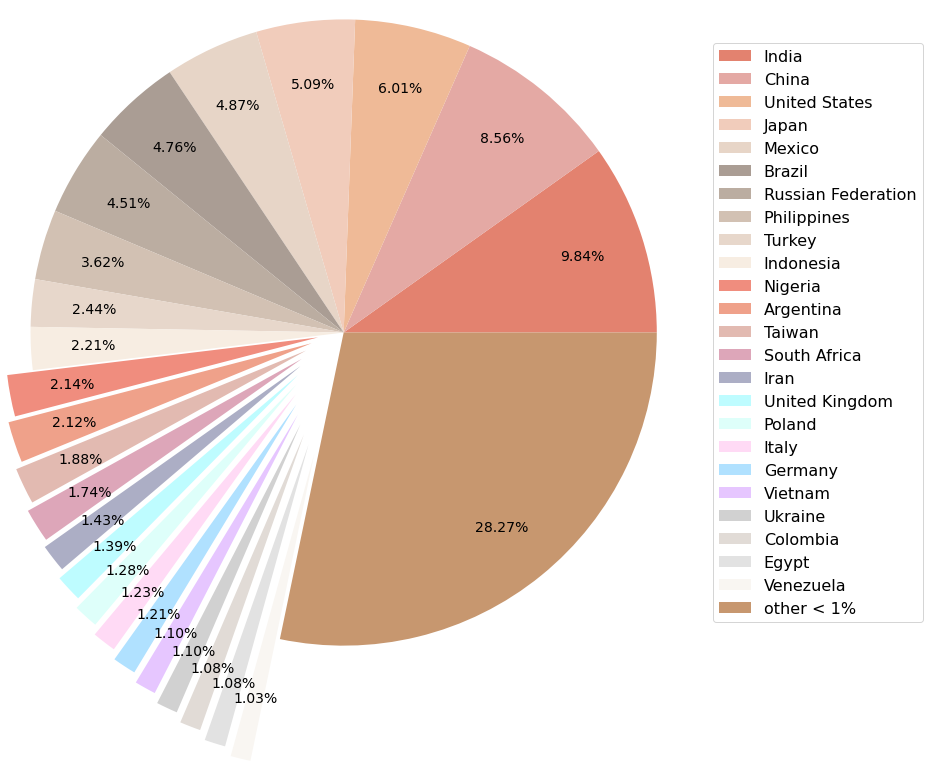

In [4]:
# import matplotlib package
import matplotlib.pyplot as plt

# membuat variabel colors
colors = ["#E3826F","#E4A9A4","#EFBA97","#F1CCBB","#E7D5C7",
          "#AA9D94","#BBADA1","#D2C1B3","#E7D7CB","#F7EDE2",
          "#F08D7E","#EFA18A","#E2BAB1","#DDA6B9","#ACAEC5",
          "#BEFCFF","#DEFFFA","#FFDAF5","#B0E1FF","#E6C6FF",
          "#D1D1D1","#E1DBD6","#E2E2E2","#F9F6F2","#C7976F"]

# query negara column
country = df.negara

# create explode variable and its value 
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10, 0.13, 0.16, 0.19, 0.21,
           0.24, 0.27, 0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0)

# set figure size
plt.figure(figsize=(14,12))

# create pie chart
plt.pie(df.persentase_pendapatan, autopct='%2.2f%%', colors=colors, pctdistance=0.8, radius=1.2, explode=explode, 
        textprops={"fontsize":14})
# add legend or label
plt.legend(country, loc="center right", fontsize=16, bbox_to_anchor=(1.4,0.5))

# plt.savefig('D:\dvdrental.png', bbox_inches='tight', dpi=400)
# show the pie chart
plt.show()
